In [2]:
#conda install -c conda-forge ta-lib

In [5]:
import pandas_datareader.data as web
import datetime as dt
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import talib as ta 
import pandas as pd

In [6]:
#Tickerを手入力
Ticker_input = input("Tickerを入力してください。日本株の場合は数字に「.T」を付け足してください ex) 7203.T")

Tickerを入力してください。日本株の場合は数字に「.T」を付け足してください ex) 7203.T 7555.T


In [7]:
stock= (Ticker_input)
stock

'7555.T'

In [8]:
#取得期間の設定
start  = dt.datetime(2016,3,1)
end    = dt.date.today()

In [9]:
#データの取得
df = web.get_data_yahoo(tickers=stock, start=start, end=end)
print(df)
df.to_csv(stock+".csv")

[*********************100%%**********************]  1 of 1 completed
             Open   High    Low  Close   Adj Close  Volume
Date                                                      
2016-03-01  877.0  877.0  877.0  877.0  787.318298       0
2016-03-02  877.0  877.0  877.0  877.0  787.318298       0
2016-03-03  860.0  861.0  846.0  846.0  759.488342    3000
2016-03-04  846.0  846.0  846.0  846.0  759.488342    1000
2016-03-07  833.0  846.0  833.0  846.0  759.488342    2000
...           ...    ...    ...    ...         ...     ...
2023-11-13  745.0  751.0  745.0  751.0  751.000000     300
2023-11-14  751.0  752.0  751.0  752.0  752.000000     200
2023-11-15  753.0  753.0  753.0  753.0  753.000000     300
2023-11-16  751.0  751.0  749.0  749.0  749.000000    1400
2023-11-17  751.0  751.0  748.0  750.0  750.000000     600

[1909 rows x 6 columns]


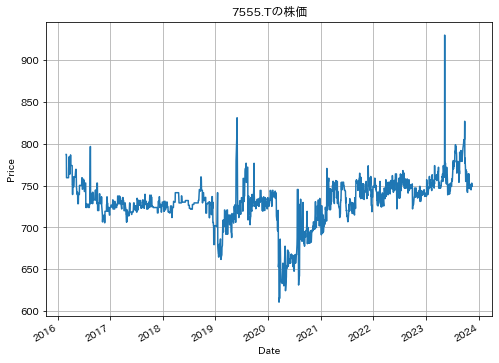

In [10]:
#株価
df["Adj Close"].plot(figsize=(8,6),fontsize=10)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(stock+"の株価")
plt.grid(True)
plt.show()

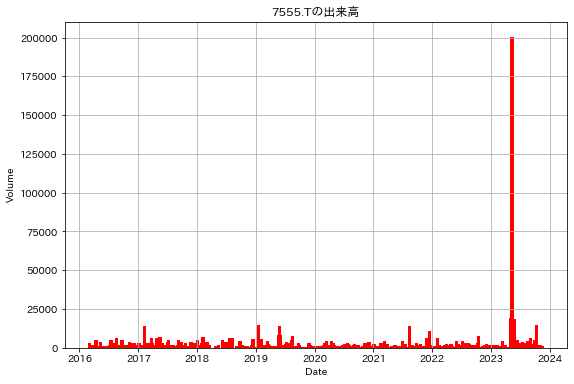

In [11]:
# 出来高
volume=df["Volume"]
date = df.index
plt.figure(figsize=(9,6))
plt.bar(date,volume, width=20,color='red')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title(stock + "の出来高")
plt.grid(True)
plt.show()

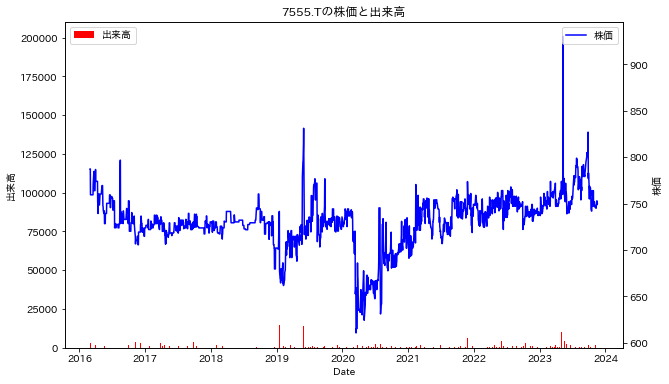

In [12]:
# figureの作成
fig, ax1 = plt.subplots(figsize=(10, 6))

# 出来高
ax1.bar(df.index, df["Volume"], width=0.5, color='red', label="出来高")
ax1.set_xlabel("Date")
ax1.set_ylabel("出来高")
ax1.tick_params("y")

# 2軸
ax2 = ax1.twinx()

# 株価
ax2.plot(df.index, df["Adj Close"], color='blue', label="株価")
ax2.set_ylabel("株価")
ax2.tick_params("y")

plt.title(stock + "の株価と出来高")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig(f"{stock}.png")
plt.show()

In [13]:
#LINEに送信
import requests

# LINE Notifyのアクセストークンを指定
token = "tokenのapiを入れる"
api_url="https://notify-api.line.me/api/notify"

In [14]:
#設定
send_contents=f"{stock}の株価と出来高"
token_dic={'Authorization':'Bearer'+' '+token}
send_dic={"message":send_contents}
print(token_dic)
print(send_dic)

{'Authorization': 'Bearer tokenのapiを入れる'}
{'message': '7555.Tの株価と出来高'}


In [57]:
#通知内容
image_file=f"./{stock}.png"
binary = open(image_file,mode="rb")
image_dic={"imageFile":binary}
requests.post(api_url,headers=token_dic,data=send_dic,files=image_dic)

<Response [200]>

In [121]:
#損益計算書の取得(yahooのAPIの問題で11月現在エラー)
stock_financial = yf.Ticker(stock)
stock_financial.income_stmt

In [ ]:
#営業利益を抽出
stock_financial.income_stmt.loc[["Operating Income"], :]

#日付を手動で追加(改善の余地あり)
dates = ["2020-03-31","2021-03-31", "2022-03-31", "2023-03-31",]

In [68]:
#行と列を転換
operate_stock=stock_financial.income_stmt.loc[["Operating Income"], :].T

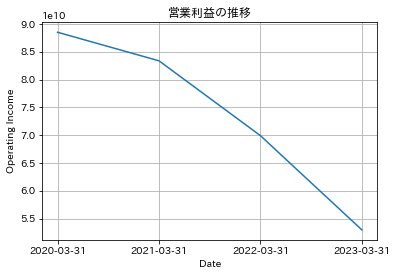

In [91]:
plt.plot(dates,operate_stock)
plt.xlabel("Date")
plt.ylabel("Operating Income")
plt.title("営業利益の推移")
plt.grid(True)
plt.show()

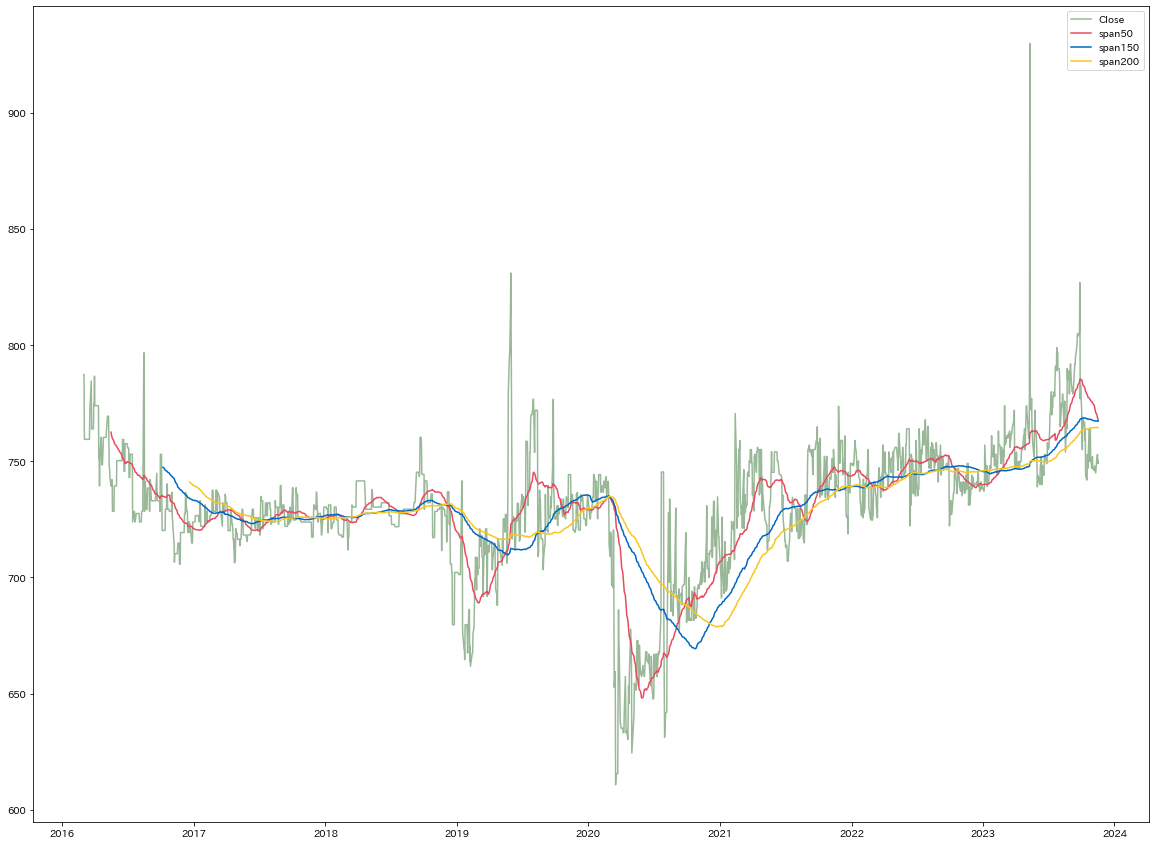

In [15]:
#移動平均線の描写
date=df.index
stock_price=df["Adj Close"]

#期間:50日、150日、200日
span50 = 50
span150 = 150
span200 = 200

#移動平均を求める
df["span50"] = stock_price.rolling(window=span50).mean()
df["span150"] = stock_price.rolling(window=span150).mean()
df["span200"] = stock_price.rolling(window=span200).mean()

#グラフ描画
plt.figure(figsize=(20,15))
plt.subplot(1,1,1)
plt.plot(date,stock_price,label="Close",color="#99b898") #終値
plt.plot(date,df["span50"],label="span50",color="#e84a5f") #50日移動平均線
plt.plot(date,df["span150"],label="span150",color="#0067C0") #150日移動平均線
plt.plot(date,df["span200"],label="span200",color="#FAC61E") #200日移動平均線
plt.legend()

plt.savefig(f"{stock}_sma.png")
plt.show()

In [74]:
#通知内容
send_contents=f"{stock}のsma"
image_file=f"./{stock}_sma.png"
binary = open(image_file,mode="rb")
image_dic={"imageFile":binary}
send_dic={"message":send_contents}
requests.post(api_url,headers=token_dic,data=send_dic,files=image_dic)

<Response [200]>

In [86]:
#複数の銘柄データを取得
stock_list=["KO","MSFT"]

start  = dt.datetime(2016,3,1)
end    = dt.datetime(2023,11,13)

stock_list_price=web.get_data_yahoo(tickers=stock_list, start=start, end=end)["Adj Close"]

[*********************100%%**********************]  2 of 2 completed


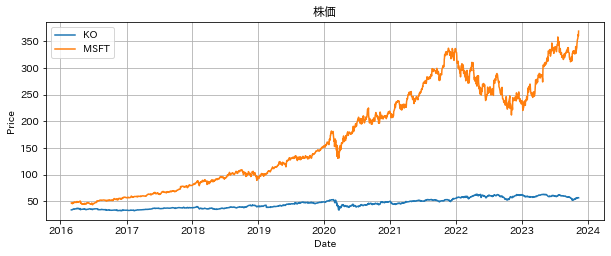

In [87]:
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(stock_list_price)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("株価")
plt.grid(True)
plt.legend(stock_list)